<a href="https://colab.research.google.com/github/KenDaupsey/Exploratory-Data-Analysis-EDA-/blob/main/Exploratory_Data_Analysis_(EDA)_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
### Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set plotting style for consistency
sns.set_style("whitegrid")

# Load data from GitHub URL
url = "https://raw.githubusercontent.com/KenDaupsey/Exploratory-Data-Analysis-EDA-/main/hsb2%7Edata.csv"
df = pd.read_csv(url)

In [21]:
### Descriptive Statistics
# Get some basic info about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       200 non-null    int64 
 1   female   200 non-null    object
 2   race     200 non-null    object
 3   ses      200 non-null    object
 4   schtyp   200 non-null    object
 5   prog     200 non-null    object
 6   read     200 non-null    int64 
 7   write    200 non-null    int64 
 8   math     200 non-null    int64 
 9   science  200 non-null    int64 
 10  socst    200 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 17.3+ KB
None


In [22]:
# Show the first few rows
print(df.head())

    id  female   race     ses  schtyp      prog  read  write  math  science  \
0   70    male  white     low  public   general    57     52    41       47   
1  121  female  white  middle  public  vocation    68     59    53       63   
2   86    male  white    high  public   general    44     33    54       58   
3  141    male  white    high  public  vocation    63     44    47       53   
4  172    male  white  middle  public  academic    47     52    57       53   

   socst  
0     57  
1     61  
2     31  
3     56  
4     61  


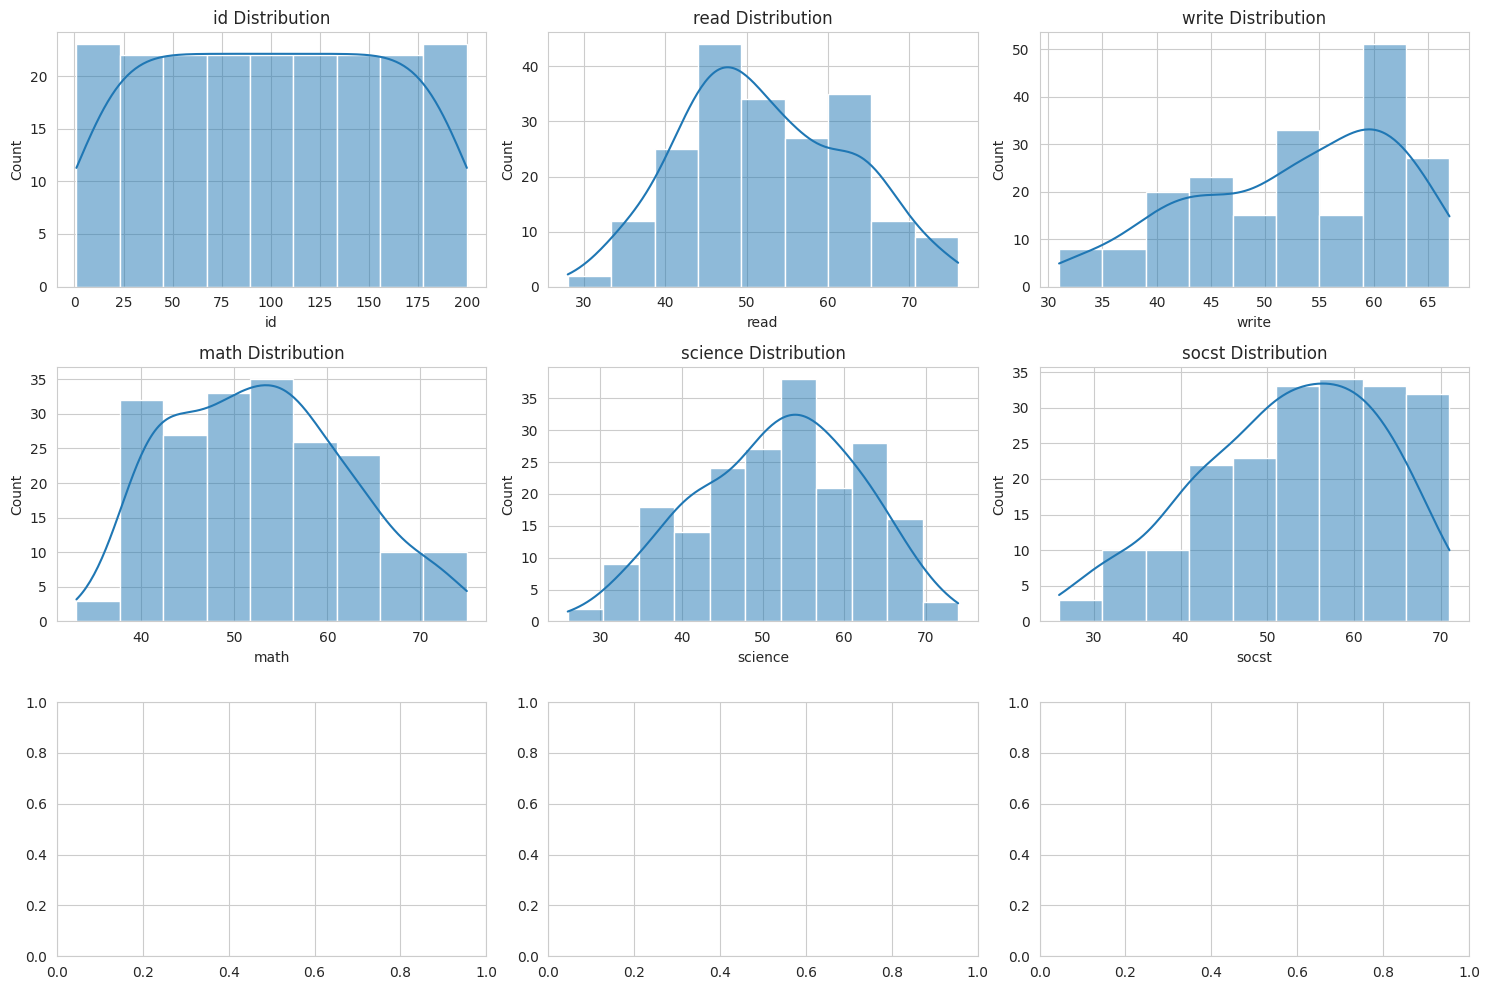

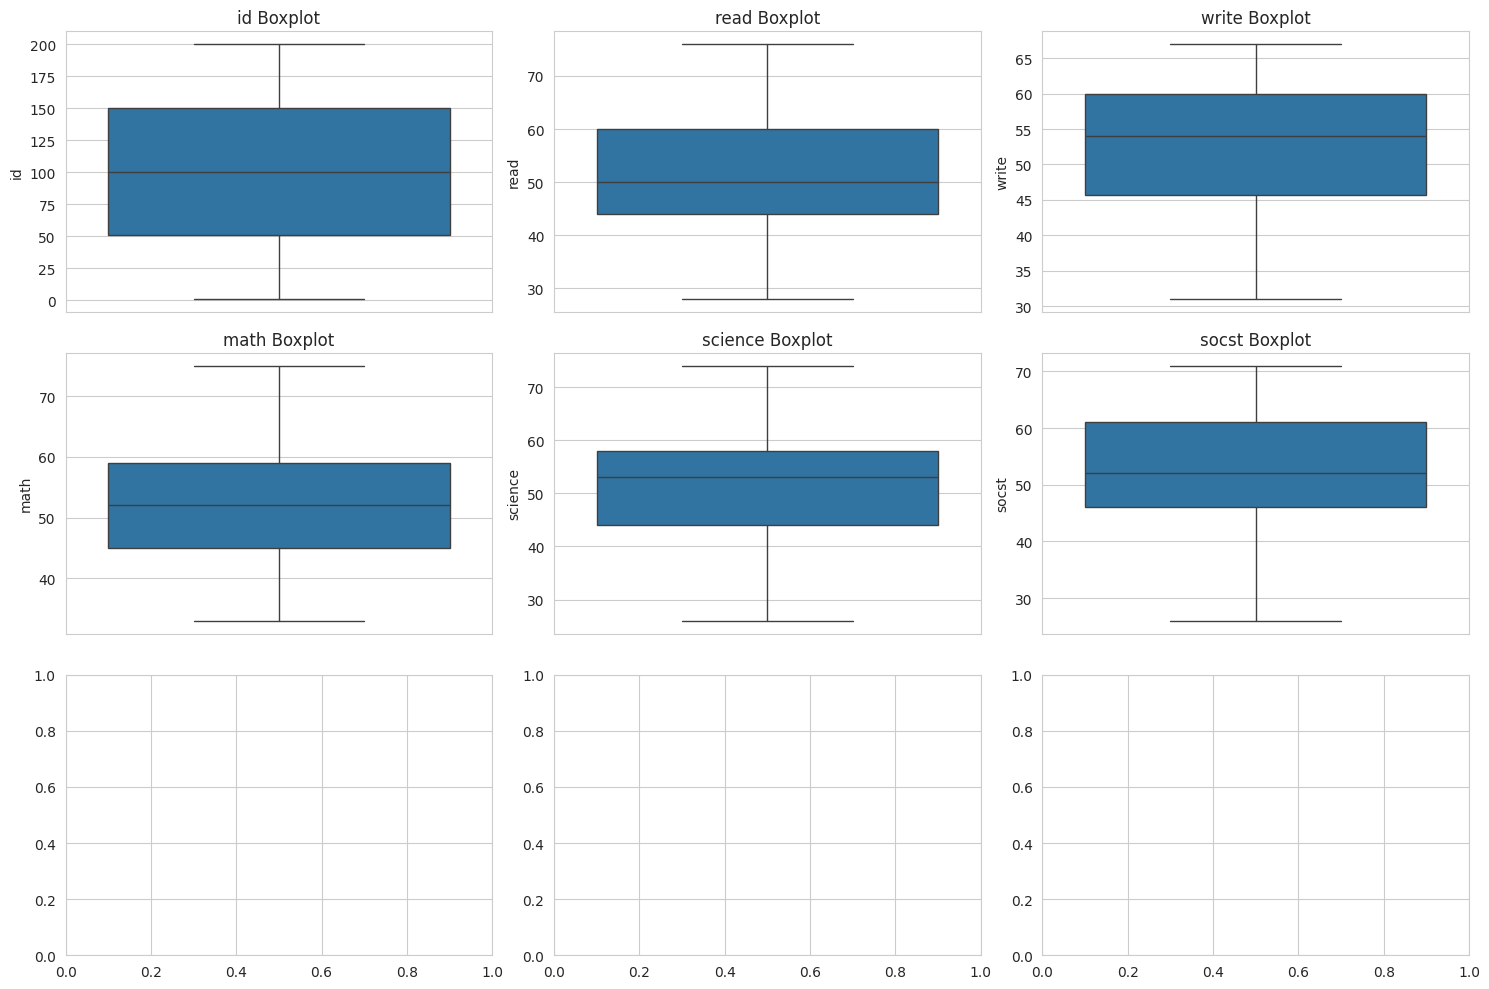

In [23]:
### Visualization
# Distributions
# Histogram for each numeric variable
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=[float, int])):
    sns.histplot(df[col], ax=axes[i//3, i%3], kde=True)
    axes[i//3, i%3].set_title(f"{col} Distribution")
plt.tight_layout()

# Boxplots to assess outliers
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=[float, int])):
    sns.boxplot(y=df[col], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"{col} Boxplot")
plt.tight_layout()

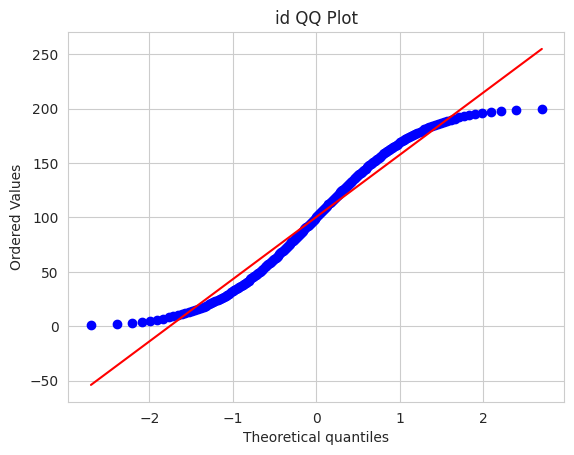

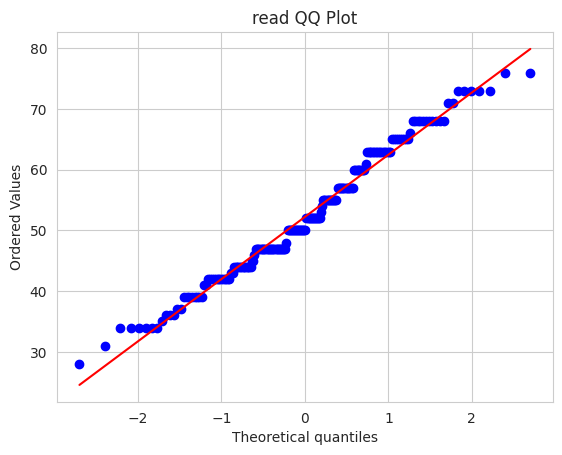

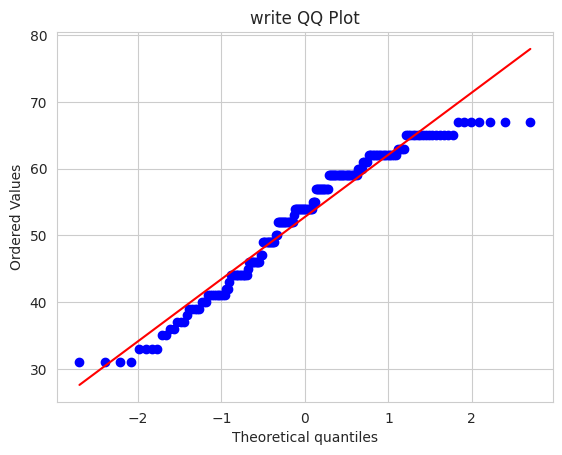

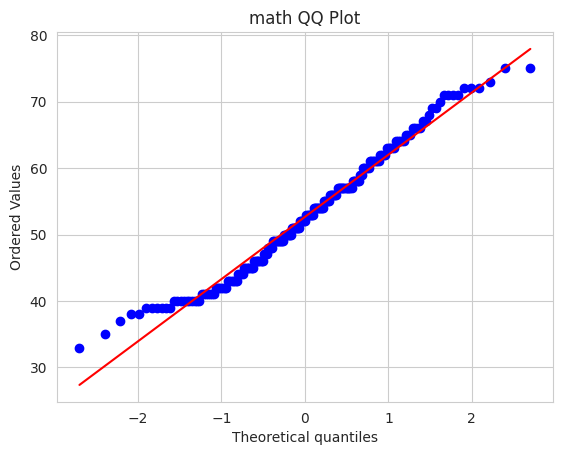

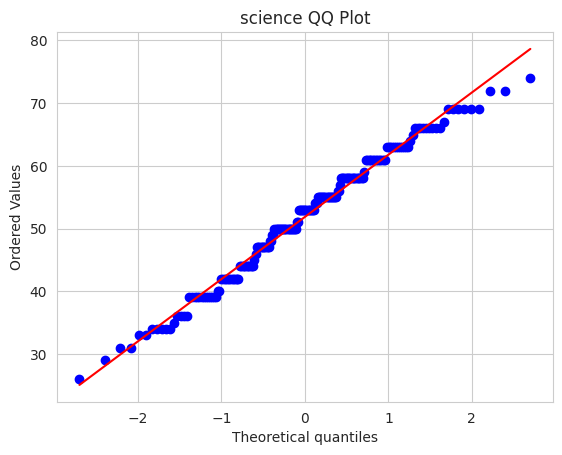

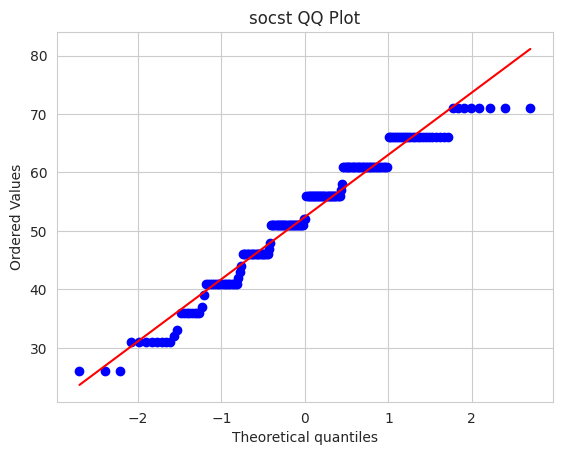

In [24]:
# Check normality of numeric variables with QQ plots
for col in df.select_dtypes(include=[float, int]):
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"{col} QQ Plot")
    plt.show()

female    0.545
male      0.455
Name: female, dtype: float64
white           0.725
hispanic        0.120
african-amer    0.100
asian           0.055
Name: race, dtype: float64
middle    0.475
high      0.290
low       0.235
Name: ses, dtype: float64
public     0.84
private    0.16
Name: schtyp, dtype: float64
academic    0.525
vocation    0.250
general     0.225
Name: prog, dtype: float64


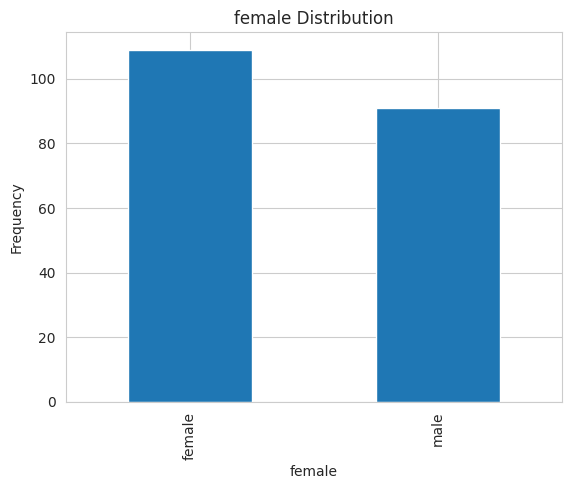

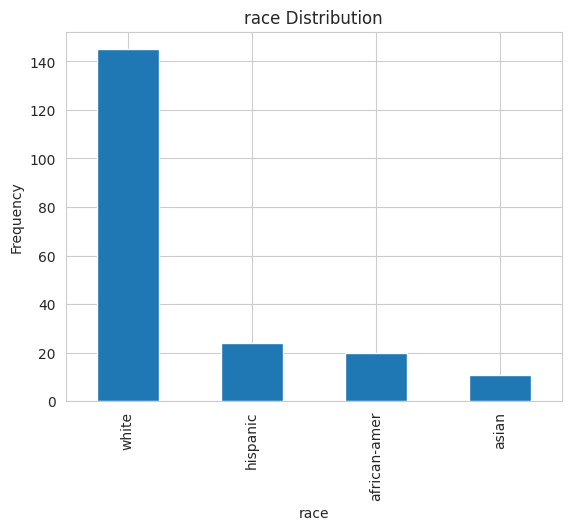

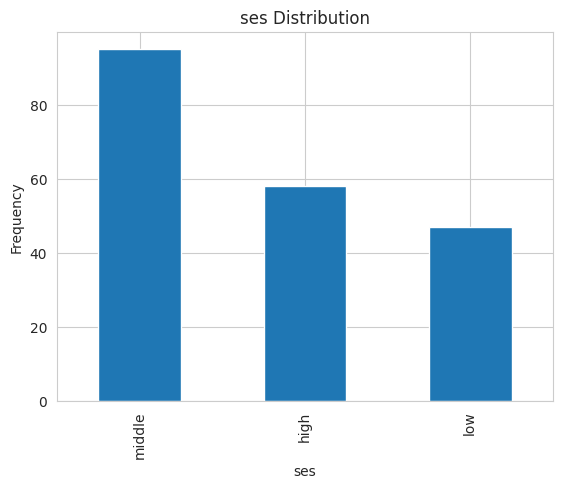

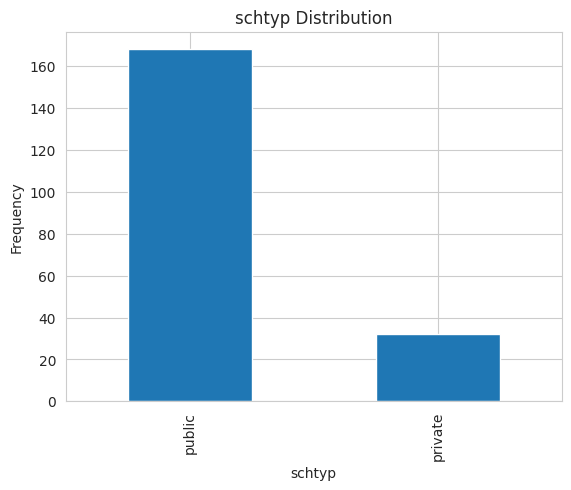

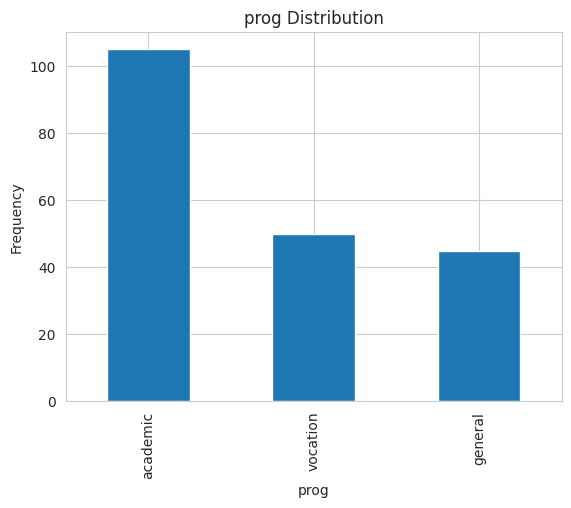

In [25]:
#### Categorical Variables
# Explore frequency counts and percentages for categorical variables
for col in df.select_dtypes(exclude=[float, int]):
    print(df[col].value_counts(normalize=True))

# Bar charts for categorical variables
for col in df.select_dtypes(exclude=[float, int]):
    df[col].value_counts().plot(kind="bar")
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

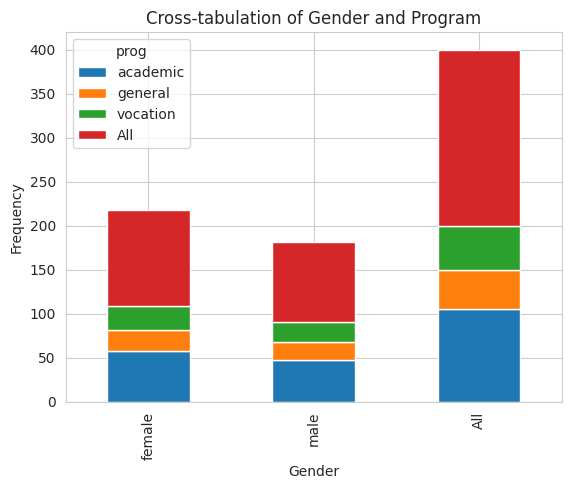

In [26]:
# Cross-tabulations to see relationships between categorical variables
pd.crosstab(df["female"], df["prog"], margins=True).plot(kind="bar", stacked=True)
plt.title("Cross-tabulation of Gender and Program")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

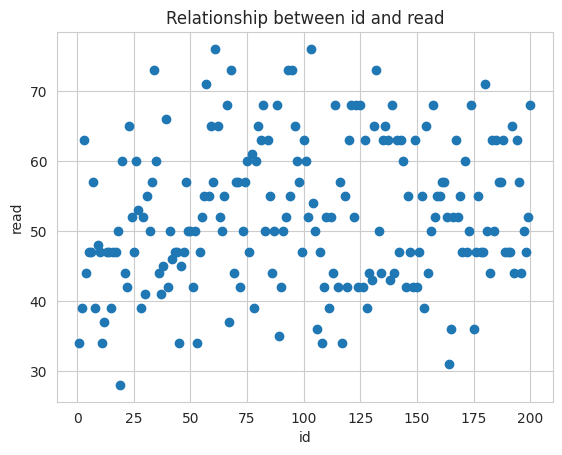

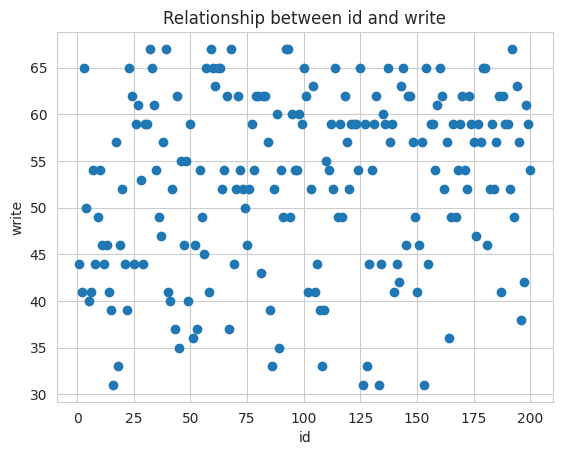

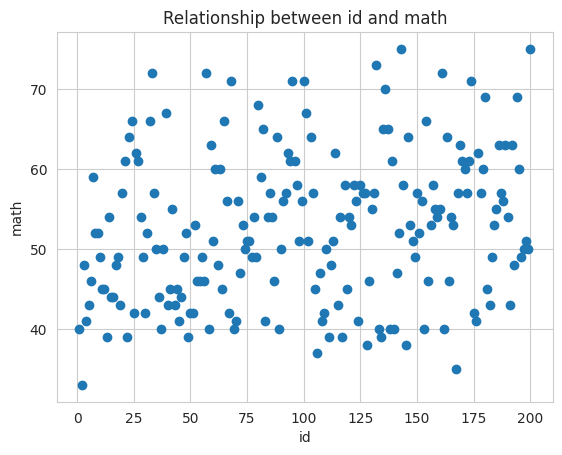

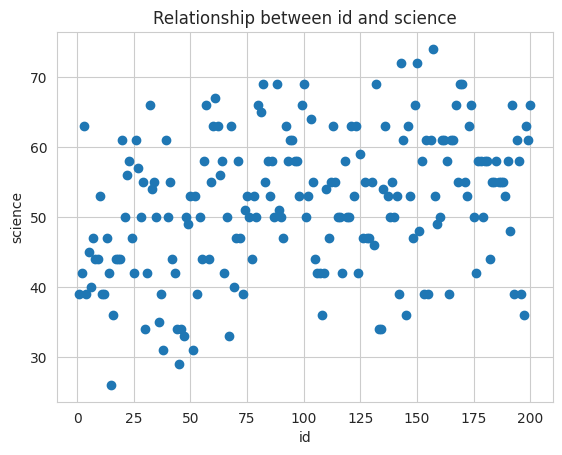

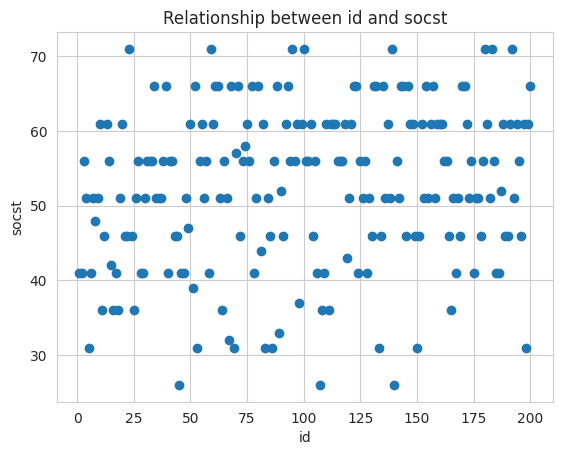

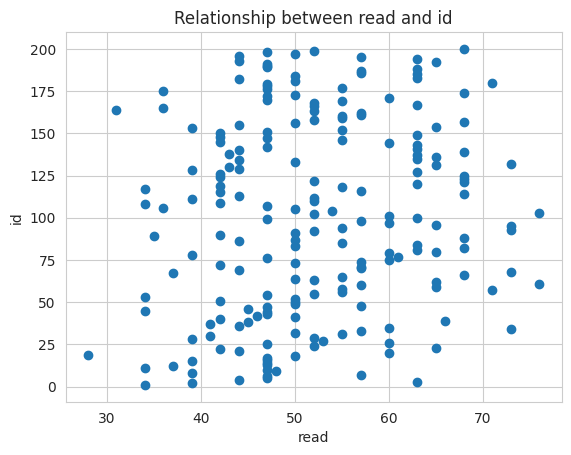

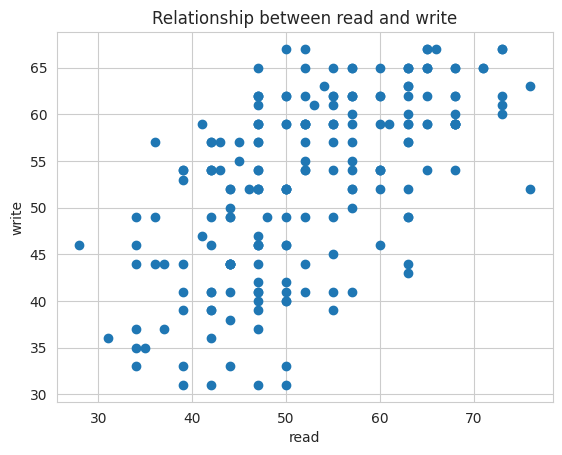

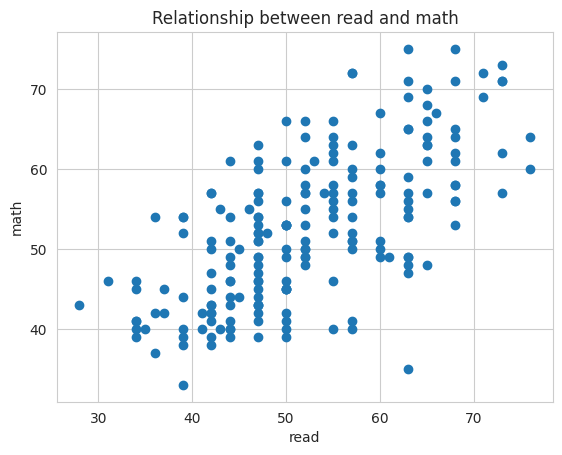

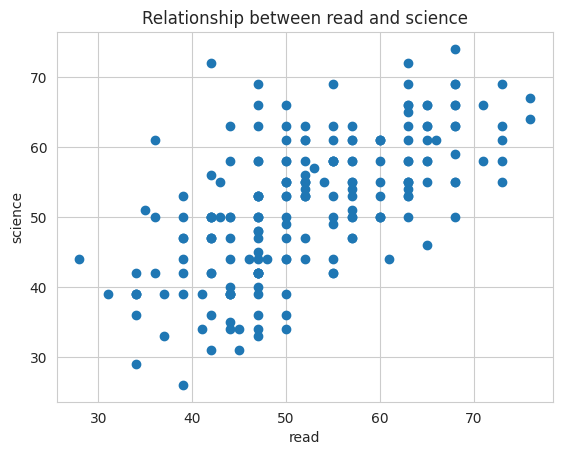

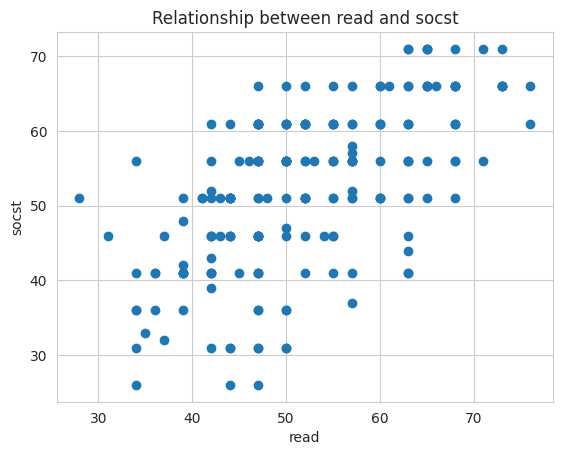

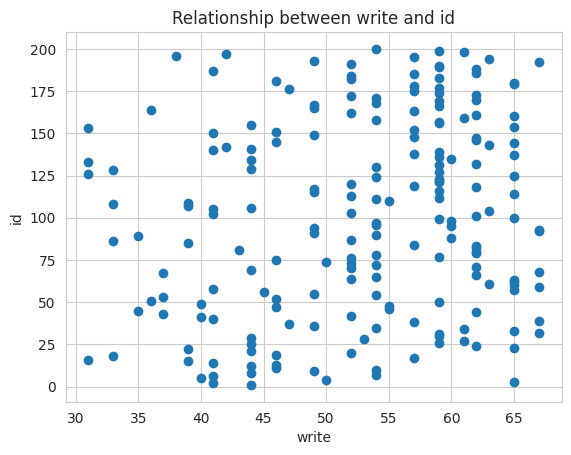

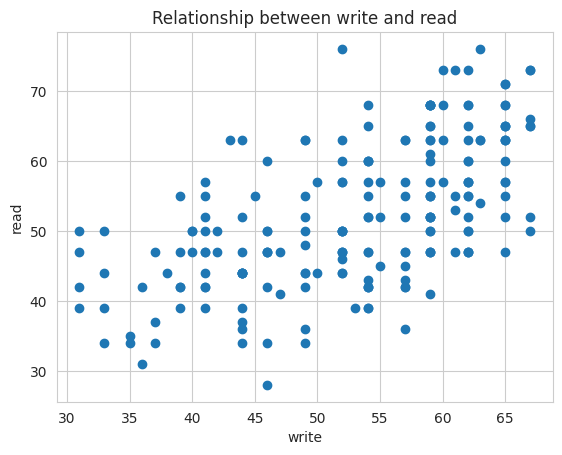

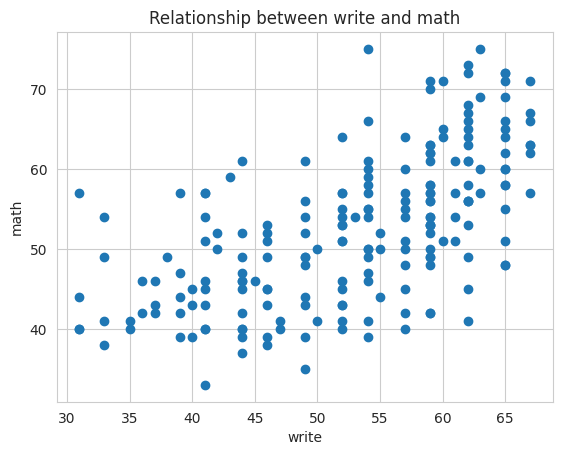

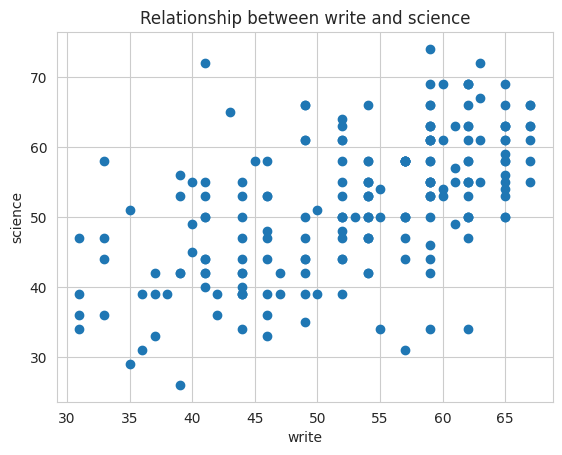

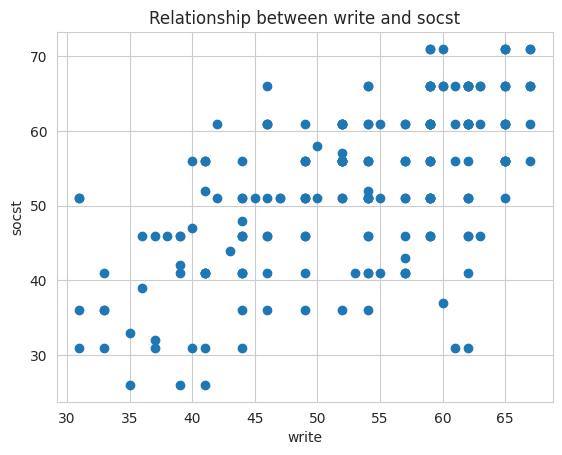

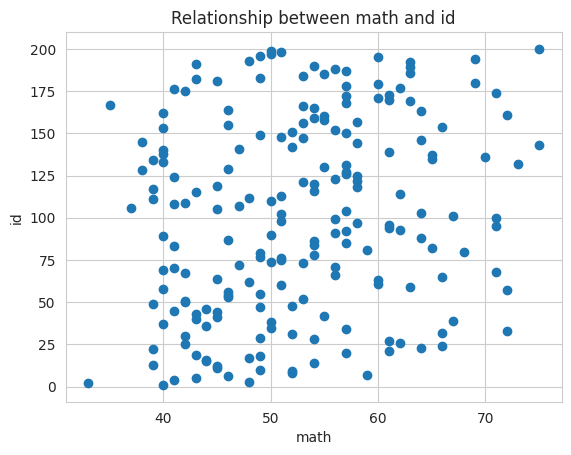

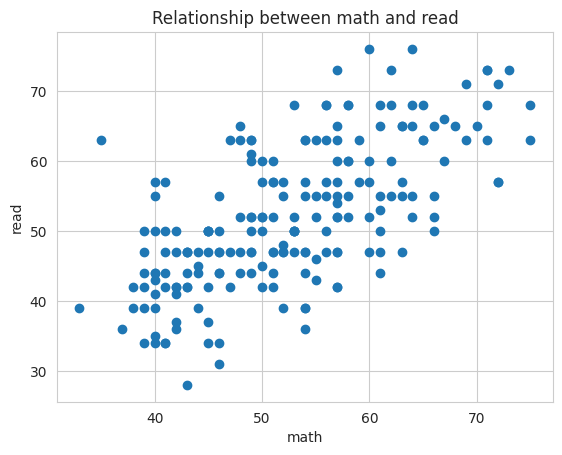

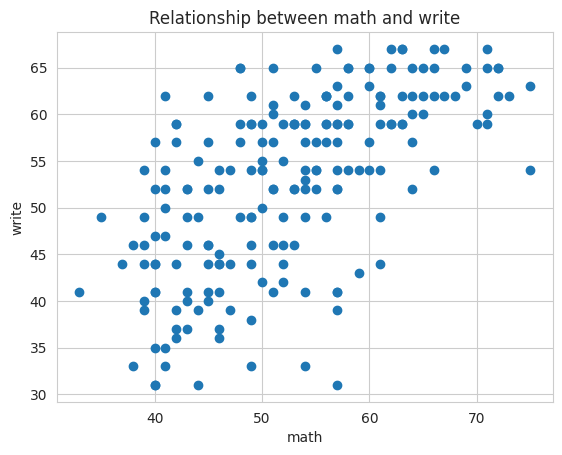

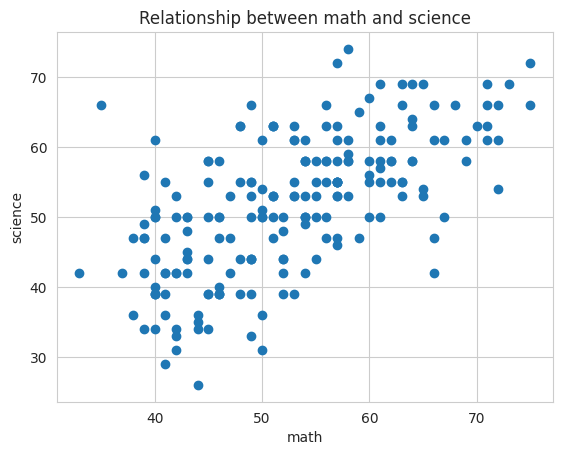

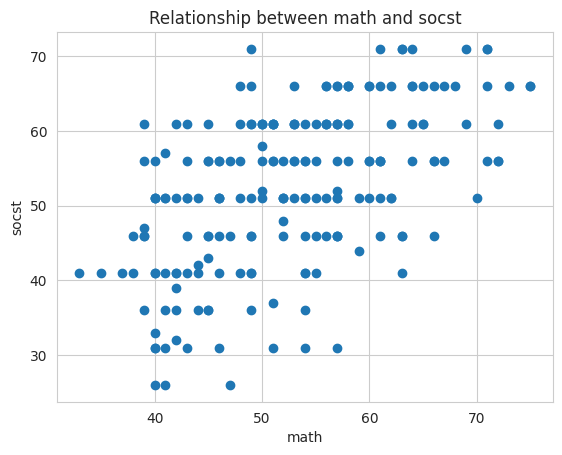

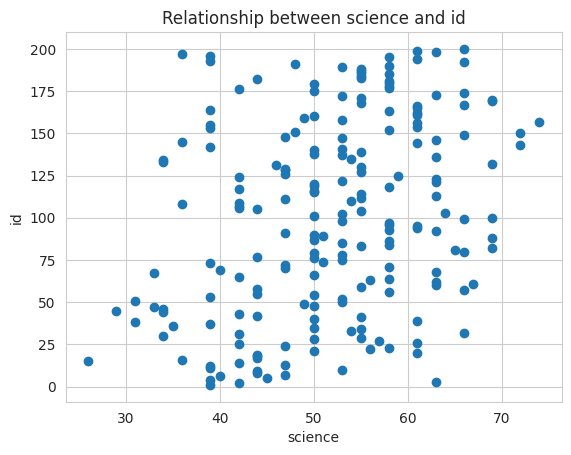

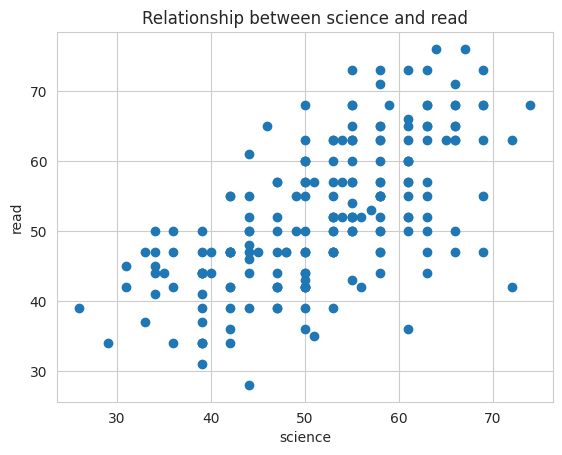

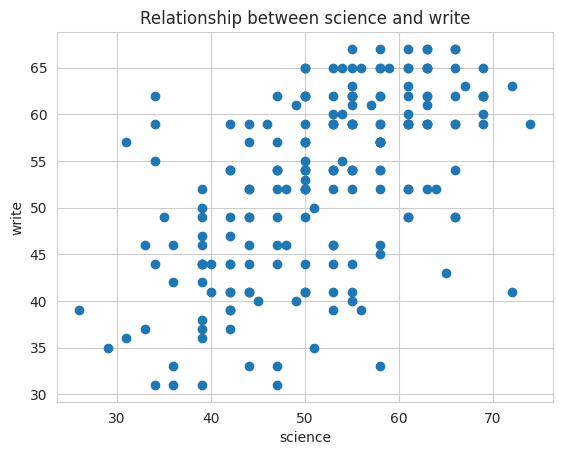

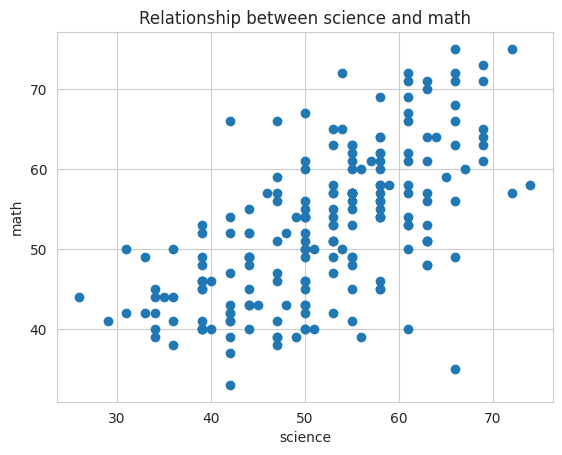

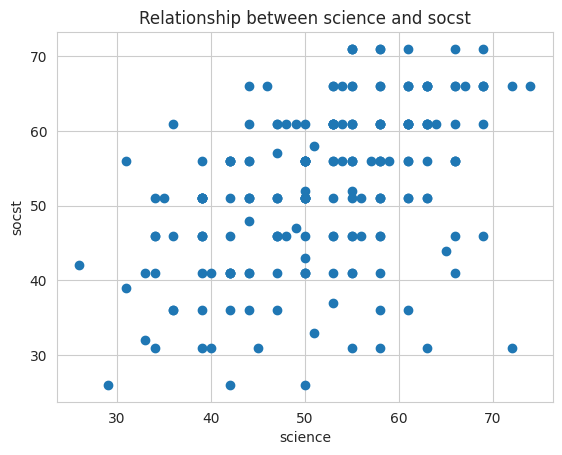

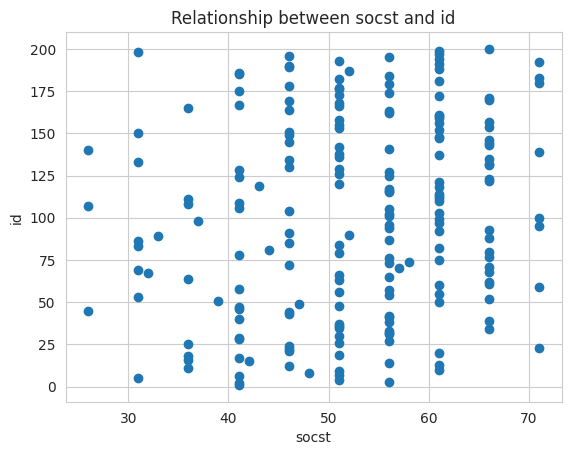

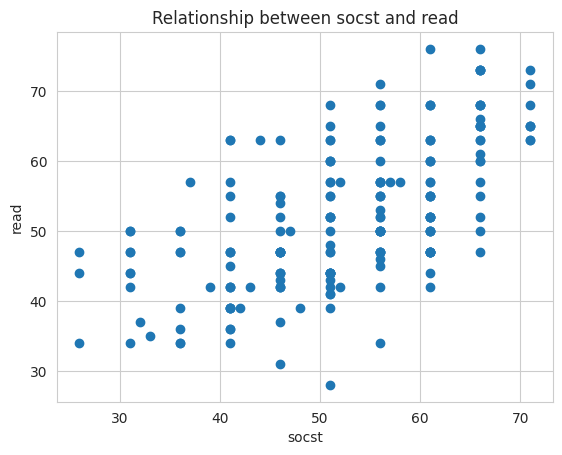

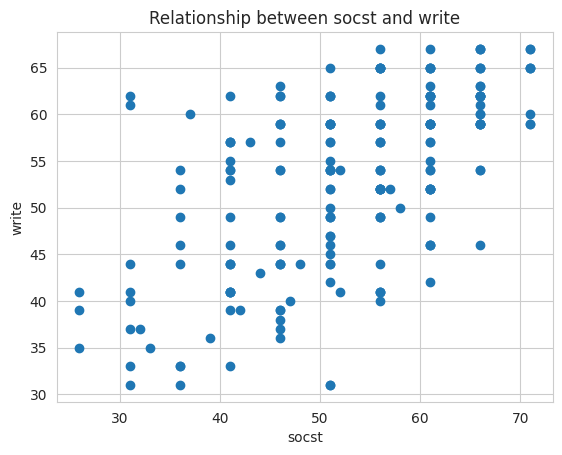

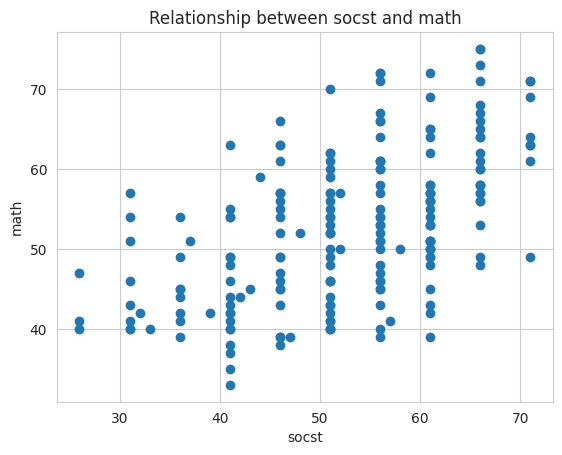

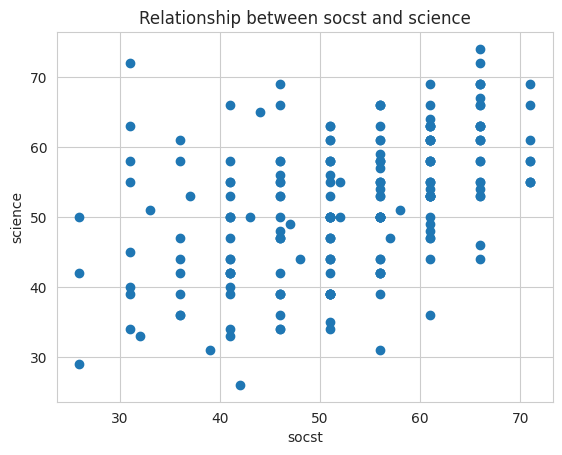

In [27]:
### Relationships between Variables
# Scatter plots to visually assess relationships
for col1 in df.select_dtypes(include=[float, int]):
    for col2 in df.select_dtypes(include=[float, int]):
        if col1 != col2:
            plt.scatter(df[col1], df[col2])
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.title(f"Relationship between {col1} and {col2}")
            plt.show()

<ipython-input-28-98c61d500a4a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


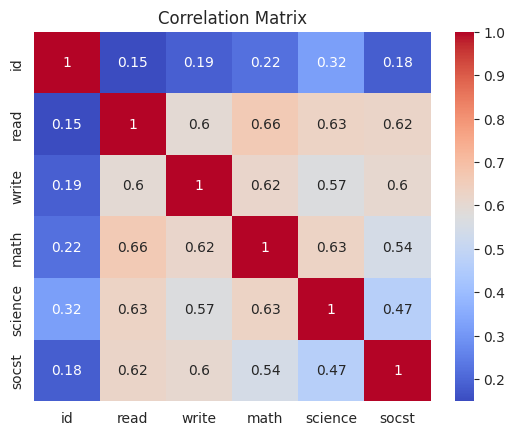

In [28]:
# Calculate correlation coefficients (e.g., Pearson's r)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#### Further Analysis:
# Group analysis by categorical variables (e.g., ANOVA, t-tests)
# Hypothesis testing to confirm specific statistical relationships
# Modeling techniques to predict outcomes based on other variables